<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.216240,58.256590,53.871893,80.141045,5.214063,279.699832,312.604220,-32.904389
1,0.0,1.0,45.862323,94.755832,59.282995,74.007607,51.282637,335.191395,312.492326,22.699069
2,0.0,2.0,25.462377,97.137301,30.322944,42.785788,-4.702508,201.005902,222.109352,-21.103450
3,0.0,3.0,74.073817,72.285024,66.941143,85.544676,85.911702,394.756362,354.196773,40.559589
4,0.0,4.0,45.572623,99.356672,25.606764,24.630643,4.001064,209.167766,250.399337,-41.231571
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.541166,68.686187,28.721341,24.254299,84.860252,312.063244,268.416664,43.646580
19996,999.0,16.0,81.642579,66.885999,75.961811,37.567486,58.710610,330.768484,281.072784,49.695700
19997,999.0,17.0,86.968233,54.735588,33.164570,21.795045,-18.494079,188.169357,249.430721,-61.261364
19998,999.0,18.0,57.934807,78.896108,66.397108,82.430447,84.968551,380.627020,267.552735,113.074286


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.216240,58.256590,53.871893,80.141045,5.214063,279.699832,312.604220,-32.904389
1,0.0,1.0,45.862323,94.755832,59.282995,74.007607,51.282637,335.191395,312.492326,22.699069
2,0.0,2.0,25.462377,97.137301,30.322944,42.785788,-4.702508,201.005902,222.109352,-21.103450
3,0.0,3.0,74.073817,72.285024,66.941143,85.544676,85.911702,394.756362,354.196773,40.559589
4,0.0,4.0,45.572623,99.356672,25.606764,24.630643,4.001064,209.167766,250.399337,-41.231571
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.541166,68.686187,28.721341,24.254299,84.860252,312.063244,268.416664,43.646580
19996,999.0,16.0,81.642579,66.885999,75.961811,37.567486,58.710610,330.768484,281.072784,49.695700
19997,999.0,17.0,86.968233,54.735588,33.164570,21.795045,-18.494079,188.169357,249.430721,-61.261364
19998,999.0,18.0,57.934807,78.896108,66.397108,82.430447,84.968551,380.627020,267.552735,113.074286


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.216240  58.256590  53.871893  80.141045   5.214063   
      1.0    45.862323  94.755832  59.282995  74.007607  51.282637   
      2.0    25.462377  97.137301  30.322944  42.785788  -4.702508   
      3.0    74.073817  72.285024  66.941143  85.544676  85.911702   
      4.0    45.572623  99.356672  25.606764  24.630643   4.001064   
...                ...        ...        ...        ...        ...   
999.0 15.0   95.541166  68.686187  28.721341  24.254299  84.860252   
      16.0   81.642579  66.885999  75.961811  37.567486  58.710610   
      17.0   86.968233  54.735588  33.164570  21.795045 -18.494079   
      18.0   57.934807  78.896108  66.397108  82.430447  84.968551   
      19.0   64.797122  28.212505  70.720056  29.928839 -53.612715   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    279.699832  312.604220  -32.904389  
      1.0    335.191395  312.492326   22.699069  
      2.0    201.005902  222.109352  -21.103450  
      3.0    394.756362  354.196773   40.559589  
      4.0    209.167766  250.399337  -41.231571  
...                 ...         ...         ...  
999.0 15.0   312.063244  268.416664   43.646580  
      16.0   330.768484  281.072784   49.695700  
      17.0   188.169357  249.430721  -61.261364  
      18.0   380.627020  267.552735  113.074286  
      19.0   150.045807  229.859768  -79.813961  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.216240  58.256590  53.871893  80.141045   5.214063   
      1.0    45.862323  94.755832  59.282995  74.007607  51.282637   
      2.0    25.462377  97.137301  30.322944  42.785788  -4.702508   
      3.0    74.073817  72.285024  66.941143  85.544676  85.911702   
      4.0    45.572623  99.356672  25.606764  24.630643   4.001064   
...                ...        ...        ...        ...        ...   
999.0 15.0   95.541166  68.686187  28.721341  24.254299  84.860252   
      16.0   81.642579  66.885999  75.961811  37.567486  58.710610   
      17.0   86.968233  54.735588  33.164570  21.795045 -18.494079   
      18.0   57.934807  78.896108  66.397108  82.430447  84.968551   
      19.0   64.797122  28.212505  70.720056  29.928839 -53.612715   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    279.699832  312.604220  -32.904389  
      1.0    335.191395  312.492326   22.699069  
      2.0    201.005902  222.109352  -21.103450  
      3.0    394.756362  354.196773   40.559589  
      4.0    209.167766  250.399337  -41.231571  
...                 ...         ...         ...  
999.0 15.0   312.063244  268.416664   43.646580  
      16.0   330.768484  281.072784   49.695700  
      17.0   188.169357  249.430721  -61.261364  
      18.0   380.627020  267.552735  113.074286  
      19.0   150.045807  229.859768  -79.813961  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.216240,58.256590,53.871893,80.141045,5.214063,279.699832,312.604220,-32.904389
1,0.0,1.0,45.862323,94.755832,59.282995,74.007607,51.282637,335.191395,312.492326,22.699069
2,0.0,2.0,25.462377,97.137301,30.322944,42.785788,-4.702508,201.005902,222.109352,-21.103450
3,0.0,3.0,74.073817,72.285024,66.941143,85.544676,85.911702,394.756362,354.196773,40.559589
4,0.0,4.0,45.572623,99.356672,25.606764,24.630643,4.001064,209.167766,250.399337,-41.231571
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.541166,68.686187,28.721341,24.254299,84.860252,312.063244,268.416664,43.646580
19996,999.0,16.0,81.642579,66.885999,75.961811,37.567486,58.710610,330.768484,281.072784,49.695700
19997,999.0,17.0,86.968233,54.735588,33.164570,21.795045,-18.494079,188.169357,249.430721,-61.261364
19998,999.0,18.0,57.934807,78.896108,66.397108,82.430447,84.968551,380.627020,267.552735,113.074286


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.216240  58.256590  53.871893  80.141045   5.214063   
      1.0    45.862323  94.755832  59.282995  74.007607  51.282637   
      2.0    25.462377  97.137301  30.322944  42.785788  -4.702508   
      3.0    74.073817  72.285024  66.941143  85.544676  85.911702   
      4.0    45.572623  99.356672  25.606764  24.630643   4.001064   
...                ...        ...        ...        ...        ...   
999.0 15.0   95.541166  68.686187  28.721341  24.254299  84.860252   
      16.0   81.642579  66.885999  75.961811  37.567486  58.710610   
      17.0   86.968233  54.735588  33.164570  21.795045 -18.494079   
      18.0   57.934807  78.896108  66.397108  82.430447  84.968551   
      19.0   64.797122  28.212505  70.720056  29.928839 -53.612715   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    279.699832  312.604220  -32.904389  
      1.0    335.191395  312.492326   22.699069  
      2.0    201.005902  222.109352  -21.103450  
      3.0    394.756362  354.196773   40.559589  
      4.0    209.167766  250.399337  -41.231571  
...                 ...         ...         ...  
999.0 15.0   312.063244  268.416664   43.646580  
      16.0   330.768484  281.072784   49.695700  
      17.0   188.169357  249.430721  -61.261364  
      18.0   380.627020  267.552735  113.074286  
      19.0   150.045807  229.859768  -79.813961  

[20000 rows x 8 columns]

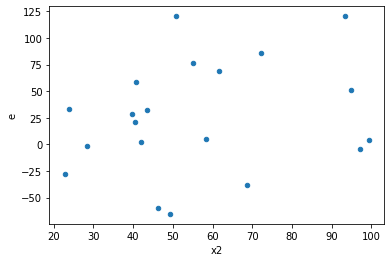

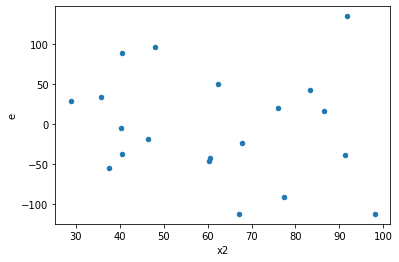

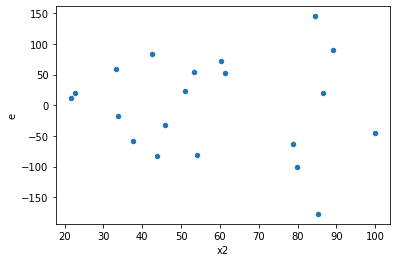

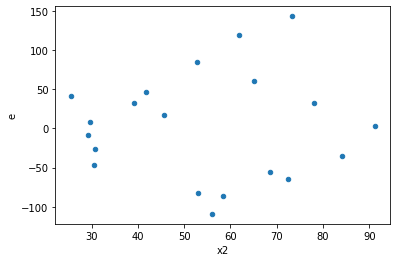

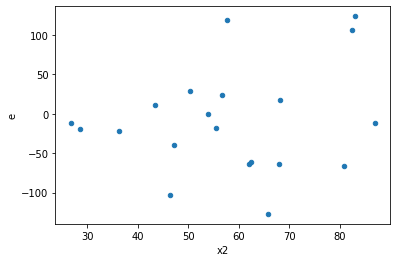

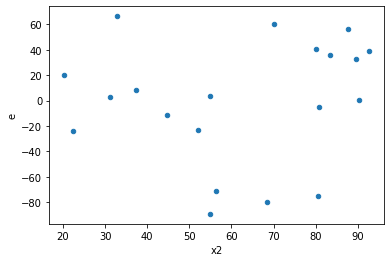

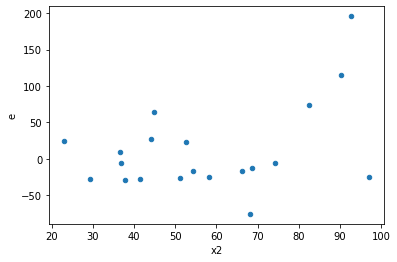

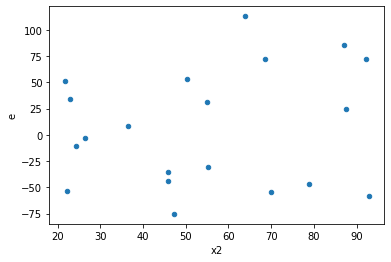

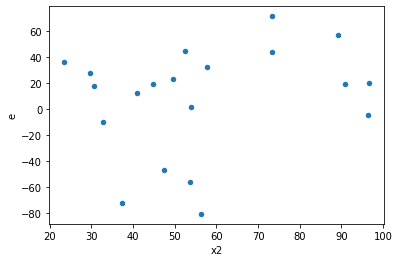

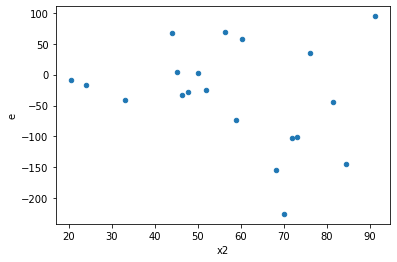

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,2543.963651310038,2809.9719956404124,635.9909128275095,702.4929989101031,1.104564522450386,0.9255343706763064,0.5372328146618468,0.4627671853381532,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,16536.17204417658,53172.55569865479,4134.043011044145,13293.138924663697,3.215529903571617,0.2842392119530619,0.857880394023469,0.14211960597653095,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,3869.2401408325804,21226.097727605087,967.3100352081451,5306.524431901272,5.485856900842983,0.1279710454170031,0.9360144772914984,0.06398552270850155,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,6703.628765585618,7972.551482088116,1675.9071913964044,1993.137870522029,1.189288930051849,0.8706311122598651,0.5646844438700674,0.43531555612993256,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,5197.275923925454,8355.256160079205,1299.3189809813634,2088.8140400198013,1.607622201010363,0.6567995201277101,0.6716002399361449,0.3283997600638551,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,5420.52461137884,24358.206000615526,1355.13115284471,6089.5515001538815,4.49369899538551,0.17467746346387636,0.9126612682680618,0.08733873173193818,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,3916.256399468538,4808.857622741364,979.0640998671345,1202.214405685341,1.22792205928957,0.8470815469775321,0.5764592265112339,0.42354077348876606,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,3989.665037374182,10210.52324071104,997.4162593435454,2552.63081017776,2.559243230963356,0.3849134707776436,0.8075432646111782,0.1924567353888218,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,21424.554607611677,47178.37991694602,5356.138651902919,11794.594979236505,2.202070511196745,0.46334632383538565,0.7683268380823072,0.23167316191769283,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,2543.963651310038,2809.9719956404124,635.9909128275095,702.4929989101031,1.104564522450386,0.9255343706763064,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,19641.525959779345,16100.373303882589,4910.381489944836,4025.093325970647,0.8197109194495326,0.8518727561808481,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,16536.17204417658,53172.55569865479,4134.043011044145,13293.138924663697,3.215529903571617,0.2842392119530619,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,3869.2401408325804,21226.097727605087,967.3100352081451,5306.524431901272,5.485856900842983,0.1279710454170031,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,6703.628765585618,7972.551482088116,1675.9071913964044,1993.137870522029,1.189288930051849,0.8706311122598651,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,5197.275923925454,8355.256160079205,1299.3189809813634,2088.8140400198013,1.607622201010363,0.6567995201277101,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,5420.52461137884,24358.206000615526,1355.13115284471,6089.5515001538815,4.49369899538551,0.17467746346387636,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,4123.193270426021,3867.0988491778407,1030.7983176065052,966.7747122944602,0.9378892997606878,0.9519404184479026,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,3916.256399468538,4808.857622741364,979.0640998671345,1202.214405685341,1.22792205928957,0.8470815469775321,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      861
Reject001=0 : Heteroscedasticity    139
Name: Result_test, dtype: int64